# Imports, API Data Request and PreProcessing

## Imports and Installations

In [1]:
!pip install requests

In [2]:
!pip install seaborn

In [8]:
import requests
import json
import pandas as pd
import numpy as np
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns

## API Data Request

In [4]:
""" potential data:
                    "LedgerSequence": ledger_info.get("ledger_index"),
                    "CloseTime": ledger_info.get("close_time_human"),
                    "TransactionType": tx.get("TransactionType"),
                    "Account": tx.get("Account"),
                    "Fee": tx.get("Fee"),
                    "TransactionResult": tx.get("meta", {}).get("TransactionResult"),
                    "TakerGets": tx.get("TakerGets"),
                    "TakerPays": tx.get("TakerPays"),
                    "Issuer": tx.get("TakerPays", {}).get("issuer") if isinstance(tx.get("TakerPays"), dict) else None,
                    "Currency": tx.get("TakerPays", {}).get("currency") if isinstance(tx.get("TakerPays"), dict) else None,
                    "Sequence": tx.get("Sequence"),
                    "OfferSequence": tx.get("OfferSequence"),
                    "OwnerCount": tx.get("OwnerCount"),
                    "Flags": tx.get("Flags")              
"""

    


' potential data:\n                    "LedgerSequence": ledger_info.get("ledger_index"),\n                    "CloseTime": ledger_info.get("close_time_human"),\n                    "TransactionType": tx.get("TransactionType"),\n                    "Account": tx.get("Account"),\n                    "Fee": tx.get("Fee"),\n                    "TransactionResult": tx.get("meta", {}).get("TransactionResult"),\n                    "TakerGets": tx.get("TakerGets"),\n                    "TakerPays": tx.get("TakerPays"),\n                    "Issuer": tx.get("TakerPays", {}).get("issuer") if isinstance(tx.get("TakerPays"), dict) else None,\n                    "Currency": tx.get("TakerPays", {}).get("currency") if isinstance(tx.get("TakerPays"), dict) else None,\n                    "Sequence": tx.get("Sequence"),\n                    "OfferSequence": tx.get("OfferSequence"),\n                    "OwnerCount": tx.get("OwnerCount"),\n                    "Flags": tx.get("Flags")              \n'

In [1]:
import requests
import json
import pandas as pd
import concurrent.futures

# Ripple API endpoint
url = "https://s1.ripple.com:51234/"  # Alternative Ripple server

# First, get the latest validated ledger index
initial_payload = {
    "method": "ledger_current",
    "params": [{}]
}

# Send the request to get the latest validated ledger
response = requests.post(url, json=initial_payload)
latest_ledger_index = response.json().get("result", {}).get("ledger_current_index")

# Define the number of ledgers to retrieve
num_ledgers = 1000

# Initialize list to store ledger data
ledger_data = []

# Function to retrieve ledger information
def get_ledger_data(ledger_index):
    print(f"Retrieving Ledger Index: {ledger_index}")

    payload = {
        "method": "ledger",
        "params": [
            {
                "ledger_index": ledger_index,
                "transactions": True,
                "expand": True
            }
        ]
    }

    response = requests.post(url, json=payload)

    try:
        response_json = response.json()  # Try to load the response as JSON
        ledger_info = response_json.get("result", {}).get("ledger", {})
        data = []

        # Extract information for each transaction in the ledger
        if "transactions" in ledger_info:
            for tx in ledger_info["transactions"]:
                data.append({
                    "LedgerSequence": ledger_info.get("ledger_index"),
                    "CloseTime": ledger_info.get("close_time_human"),
                    # General transaction fields
                    "TransactionType": tx.get("TransactionType"),
                    "Account": tx.get("Account"),
                    "Fee": tx.get("Fee"),
                    "Sequence": tx.get("Sequence"),
                    "AccountTxnID": tx.get("AccountTxnID"),
                    "Flags": tx.get("Flags"),
                    "LastLedgerSequence": tx.get("LastLedgerSequence"),
                    "Memos": tx.get("Memos"),
                    "NetworkID": tx.get("NetworkID"),
                    "Signers": tx.get("Signers"),
                    "SourceTag": tx.get("SourceTag"),
                    "SigningPubKey": tx.get("SigningPubKey"),
                    "TicketSequence": tx.get("TicketSequence"),
                    "TxnSignature": tx.get("TxnSignature"),
                    # Payment-specific fields
                    "Amount": tx.get("Amount"),
                    "Destination": tx.get("Destination"),
                    "DestinationTag": tx.get("DestinationTag"),
                    "InvoiceID": tx.get("InvoiceID"),
                    "Paths": tx.get("Paths"),
                    "SendMax": tx.get("SendMax"),
                    "DeliverMin": tx.get("DeliverMin"),
                    # OfferCreate-specific fields
                    "TakerGets": tx.get("TakerGets"),
                    "TakerPays": tx.get("TakerPays"),
                    "Expiration": tx.get("Expiration"),
                    "OfferSequence": tx.get("OfferSequence"),
                    # TrustSet-specific fields
                    "LimitAmount": tx.get("LimitAmount"),
                    "QualityIn": tx.get("QualityIn"),
                    "QualityOut": tx.get("QualityOut"),
                    # Escrow-specific fields
                    "FinishAfter": tx.get("FinishAfter"),
                    "CancelAfter": tx.get("CancelAfter"),
                    "Condition": tx.get("Condition"),
                    "Fulfillment": tx.get("Fulfillment"),
                    # Meta-information
                    "TransactionResult": tx.get("meta", {}).get("TransactionResult"),
                    "AffectedNodes": tx.get("meta", {}).get("AffectedNodes"),
                    "DeliveredAmount": tx.get("meta", {}).get("delivered_amount"),
                    # Additional fields for other transaction types
                    "OwnerCount": tx.get("OwnerCount"),
                    "SetFlag": tx.get("SetFlag"),
                    "ClearFlag": tx.get("ClearFlag"),
                    "Domain": tx.get("Domain"),
                    "EmailHash": tx.get("EmailHash"),
                    "MessageKey": tx.get("MessageKey"),
                    "TransferRate": tx.get("TransferRate"),
                    "RegularKey": tx.get("RegularKey")
                })
        return data

    except json.JSONDecodeError:
        print(f"Error: The response for ledger {ledger_index} is not a valid JSON.")
        print("Raw response from server:")
        print(response.text)
        return []

# Use ThreadPoolExecutor to parallelize ledger retrieval
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(get_ledger_data, str(int(latest_ledger_index) - i)) for i in range(num_ledgers)]

    # Collect results as they complete
    for future in concurrent.futures.as_completed(futures):
        ledger_data.extend(future.result())  # Add the results to the ledger_data list

# Convert the collected data to a pandas DataFrame
df = pd.DataFrame(ledger_data)
print(df.head())


Retrieving Ledger Index: 90860329Retrieving Ledger Index: 90860328

Retrieving Ledger Index: 90860327
Retrieving Ledger Index: 90860326
Retrieving Ledger Index: 90860325
Retrieving Ledger Index: 90860324
Retrieving Ledger Index: 90860323
Retrieving Ledger Index: 90860322
Retrieving Ledger Index: 90860321
Retrieving Ledger Index: 90860320
Retrieving Ledger Index: 90860319
Retrieving Ledger Index: 90860318
Retrieving Ledger Index: 90860317
Retrieving Ledger Index: 90860316
Retrieving Ledger Index: 90860315
Retrieving Ledger Index: 90860314
Retrieving Ledger Index: 90860313
Retrieving Ledger Index: 90860312
Retrieving Ledger Index: 90860311
Retrieving Ledger Index: 90860310
Retrieving Ledger Index: 90860309
Retrieving Ledger Index: 90860308
Retrieving Ledger Index: 90860307
Retrieving Ledger Index: 90860306
Retrieving Ledger Index: 90860305
Retrieving Ledger Index: 90860304
Retrieving Ledger Index: 90860303
Retrieving Ledger Index: 90860302
Retrieving Ledger Index: 90860301
Retrieving Led

## Data Preprocessing

In [2]:
df

,LedgerSequence,CloseTime,TransactionType,Account,Fee,Sequence,AccountTxnID,Flags,LastLedgerSequence,Memos,...,AffectedNodes,DeliveredAmount,OwnerCount,SetFlag,ClearFlag,Domain,EmailHash,MessageKey,TransferRate,RegularKey
0,90860322,2024-Sep-19 17:42:50.000000000 UTC,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14486852,None,655360.0,90860323.0,None,...,None,None,None,None,None,None,None,None,None,None
1,90860322,2024-Sep-19 17:42:50.000000000 UTC,Payment,rLR5BTsGcnMp5SwUzX1V9VCTbN1hayH61R,10,89794944,None,NaN,NaN,None,...,None,None,None,None,None,None,None,None,None,None
2,90860322,2024-Sep-19 17:42:50.000000000 UTC,Payment,rapido5rxPmP4YkMZZEeXSHqWefxHEkqv6,10,21274300,None,131072.0,90860323.0,None,...,None,None,None,None,None,None,None,None,None,None
3,90860322,2024-Sep-19 17:42:50.000000000 UTC,NFTokenAcceptOffer,r3qebgzfnj8odT4uLUk7CkikwnocE1HFgB,12,57714839,None,NaN,90860330.0,None,...,None,None,None,None,None,None,None,None,None,None
4,90860322,2024-Sep-19 17:42:50.000000000 UTC,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14486860,None,655360.0,90860323.0,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64833,90859331,2024-Sep-19 16:39:01.000000000 UTC,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14475379,None,655360.0,90859331.0,None,...,None,None,None,None,None,None,None,None,None,None
64834,90859331,2024-Sep-19 16:39:01.000000000 UTC,Payment,rLVTL55bRs6NeyZeDN5NWoDQg9Tjk8GnZC,10,89795390,None,NaN,NaN,None,...,None,None,None,None,None,None,None,None,None,None
64835,90859331,2024-Sep-19 16:39:01.000000000 UTC,OfferCreate,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,15,143764603,None,0.0,90859333.0,None,...,None,None,None,None,None,None,None,None,None,None
64836,90859331,2024-Sep-19 16:39:01.000000000 UTC,Payment,rLu7e31Ff6uLk6p192NB4JfHx2onCZArzv,10,89726961,None,NaN,NaN,None,...,None,None,None,None,None,None,None,None,None,None


In [3]:
df.dtypes

LedgerSequence         object
CloseTime              object
TransactionType        object
Account                object
Fee                    object
Sequence                int64
AccountTxnID           object
Flags                 float64
LastLedgerSequence    float64
Memos                  object
NetworkID              object
Signers                object
SourceTag             float64
SigningPubKey          object
TicketSequence        float64
TxnSignature           object
Amount                 object
Destination            object
DestinationTag        float64
InvoiceID              object
Paths                  object
SendMax                object
DeliverMin             object
TakerGets              object
TakerPays              object
Expiration            float64
OfferSequence         float64
LimitAmount            object
QualityIn             float64
QualityOut            float64
FinishAfter           float64
CancelAfter           float64
Condition              object
Fulfillmen

In [4]:
# Convert general fields
df['LedgerSequence'] = pd.to_numeric(df['LedgerSequence'])
df['CloseTime'] = pd.to_datetime(df['CloseTime'])
df['TransactionType'] = df['TransactionType'].astype(str)
df['Account'] = df['Account'].astype(str)
df['Fee'] = pd.to_numeric(df['Fee'])
df['Sequence'] = pd.to_numeric(df['Sequence'])
df['AccountTxnID'] = df['AccountTxnID'].astype(str)

# Convert numeric fields
df['Flags'] = pd.to_numeric(df['Flags'], errors='coerce')
df['LastLedgerSequence'] = pd.to_numeric(df['LastLedgerSequence'], errors='coerce')
df['NetworkID'] = pd.to_numeric(df['NetworkID'], errors='coerce')
df['SourceTag'] = pd.to_numeric(df['SourceTag'], errors='coerce')
df['TicketSequence'] = pd.to_numeric(df['TicketSequence'], errors='coerce')
df['OfferSequence'] = pd.to_numeric(df['OfferSequence'], errors='coerce')
df['OwnerCount'] = pd.to_numeric(df['OwnerCount'], errors='coerce')
df['DestinationTag'] = pd.to_numeric(df['DestinationTag'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # If 'Amount' is always numeric
df['SendMax'] = pd.to_numeric(df['SendMax'], errors='coerce')  # If 'SendMax' is numeric
df['DeliverMin'] = pd.to_numeric(df['DeliverMin'], errors='coerce')
df['Expiration'] = pd.to_numeric(df['Expiration'], errors='coerce')
df['LimitAmount'] = pd.to_numeric(df['LimitAmount'], errors='coerce')
df['QualityIn'] = pd.to_numeric(df['QualityIn'], errors='coerce')
df['QualityOut'] = pd.to_numeric(df['QualityOut'], errors='coerce')
df['TransferRate'] = pd.to_numeric(df['TransferRate'], errors='coerce')
df['RegularKey'] = pd.to_numeric(df['RegularKey'], errors='coerce')  # If applicable

# Convert datetime fields
df['FinishAfter'] = pd.to_datetime(df['FinishAfter'], errors='coerce')
df['CancelAfter'] = pd.to_datetime(df['CancelAfter'], errors='coerce')

# Convert string fields
df['SigningPubKey'] = df['SigningPubKey'].astype(str)
df['TxnSignature'] = df['TxnSignature'].astype(str)
df['InvoiceID'] = df['InvoiceID'].astype(str)
df['Destination'] = df['Destination'].astype(str)  # Assuming Destination is always an address format
df['Domain'] = df['Domain'].astype(str)  # Domain is a string field
df['EmailHash'] = df['EmailHash'].astype(str)  # EmailHash is a string field
df['MessageKey'] = df['MessageKey'].astype(str)  # MessageKey is a string field
df['Condition'] = df['Condition'].astype(str)  # Assuming Condition is a string field
df['Fulfillment'] = df['Fulfillment'].astype(str)  # Assuming Fulfillment is a string field
df['TransactionResult'] = df['TransactionResult'].astype(str)

# Convert object fields (list of dictionaries or complex structures)
df['Memos'] = df['Memos'].astype(object)  # Treat 'Memos' as an object (e.g., list of dicts)
df['Signers'] = df['Signers'].astype(object)
df['Paths'] = df['Paths'].astype(object)
df['TakerGets'] = df['TakerGets'].astype(object)  # 'TakerGets' and 'TakerPays' can be either dicts or strings
df['TakerPays'] = df['TakerPays'].astype(object)
df['AffectedNodes'] = df['AffectedNodes'].astype(object)  # AffectedNodes is a complex structure

# Special cases
# Handle 'TakerGets' and 'TakerPays' since they can be either numeric or objects (e.g., dicts)
df['TakerGets'] = df['TakerGets'].apply(lambda x: str(x) if isinstance(x, dict) else pd.to_numeric(x, errors='coerce'))
df['TakerPays'] = df['TakerPays'].apply(lambda x: str(x) if isinstance(x, dict) else pd.to_numeric(x, errors='coerce'))

# Convert boolean or flag fields
df['SetFlag'] = pd.to_numeric(df['SetFlag'], errors='coerce')
df['ClearFlag'] = pd.to_numeric(df['ClearFlag'], errors='coerce')

# Replace the string "None" with real None (NaN in pandas)
df = df.replace("None", None)


In [5]:
df.dtypes

LedgerSequence                      int64
CloseTime             datetime64[ns, UTC]
TransactionType                    object
Account                            object
Fee                                 int64
Sequence                            int64
AccountTxnID                       object
Flags                             float64
LastLedgerSequence                float64
Memos                              object
NetworkID                         float64
Signers                            object
SourceTag                         float64
SigningPubKey                      object
TicketSequence                    float64
TxnSignature                       object
Amount                            float64
Destination                        object
DestinationTag                    float64
InvoiceID                          object
Paths                              object
SendMax                           float64
DeliverMin                        float64
TakerGets                         

In [6]:
df

,LedgerSequence,CloseTime,TransactionType,Account,Fee,Sequence,AccountTxnID,Flags,LastLedgerSequence,Memos,...,AffectedNodes,DeliveredAmount,OwnerCount,SetFlag,ClearFlag,Domain,EmailHash,MessageKey,TransferRate,RegularKey
0,90860322,2024-09-19 17:42:50+00:00,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14486852,None,655360.0,90860323.0,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN
1,90860322,2024-09-19 17:42:50+00:00,Payment,rLR5BTsGcnMp5SwUzX1V9VCTbN1hayH61R,10,89794944,None,NaN,NaN,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN
2,90860322,2024-09-19 17:42:50+00:00,Payment,rapido5rxPmP4YkMZZEeXSHqWefxHEkqv6,10,21274300,None,131072.0,90860323.0,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN
3,90860322,2024-09-19 17:42:50+00:00,NFTokenAcceptOffer,r3qebgzfnj8odT4uLUk7CkikwnocE1HFgB,12,57714839,None,NaN,90860330.0,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN
4,90860322,2024-09-19 17:42:50+00:00,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14486860,None,655360.0,90860323.0,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64833,90859331,2024-09-19 16:39:01+00:00,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14475379,None,655360.0,90859331.0,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN
64834,90859331,2024-09-19 16:39:01+00:00,Payment,rLVTL55bRs6NeyZeDN5NWoDQg9Tjk8GnZC,10,89795390,None,NaN,NaN,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN
64835,90859331,2024-09-19 16:39:01+00:00,OfferCreate,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,15,143764603,None,0.0,90859333.0,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN
64836,90859331,2024-09-19 16:39:01+00:00,Payment,rLu7e31Ff6uLk6p192NB4JfHx2onCZArzv,10,89726961,None,NaN,NaN,None,...,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN


In [9]:
# check if API request worked for every ledger
np.sort(df['LedgerSequence'].unique())

array([90859330, 90859331, 90859332, 90859333, 90859334, 90859335,
       90859336, 90859337, 90859338, 90859339, 90859340, 90859341,
       90859342, 90859343, 90859344, 90859345, 90859346, 90859347,
       90859348, 90859349, 90859350, 90859351, 90859352, 90859353,
       90859354, 90859355, 90859356, 90859357, 90859358, 90859359,
       90859360, 90859361, 90859362, 90859363, 90859364, 90859365,
       90859366, 90859367, 90859368, 90859369, 90859370, 90859371,
       90859372, 90859373, 90859374, 90859375, 90859376, 90859377,
       90859378, 90859379, 90859380, 90859381, 90859382, 90859383,
       90859384, 90859385, 90859386, 90859387, 90859388, 90859389,
       90859390, 90859391, 90859392, 90859393, 90859394, 90859395,
       90859396, 90859397, 90859398, 90859399, 90859400, 90859401,
       90859402, 90859403, 90859404, 90859405, 90859406, 90859407,
       90859408, 90859409, 90859410, 90859411, 90859412, 90859413,
       90859414, 90859415, 90859416, 90859417, 90859418, 90859

In [10]:
# get overview
df.describe()

,LedgerSequence,Fee,Sequence,Flags,LastLedgerSequence,NetworkID,SourceTag,TicketSequence,Amount,DestinationTag,...,LimitAmount,QualityIn,QualityOut,FinishAfter,CancelAfter,OwnerCount,SetFlag,ClearFlag,TransferRate,RegularKey
count,6.483800e+04,6.483800e+04,6.483800e+04,5.882200e+04,5.799300e+04,0.0,7.752000e+03,2.410000e+02,1.508800e+04,1.232100e+04,...,0.0,4.0,4.0,1,1,0.0,0.0,0.0,0.0,0.0
mean,9.085986e+07,1.575890e+03,7.176886e+07,1.310449e+08,9.102441e+07,NaN,5.699866e+07,8.777027e+07,3.976792e+13,2.742813e+08,...,NaN,0.0,0.0,1970-01-01 00:00:00.780081900,1970-01-01 00:00:00.780139800,NaN,NaN,NaN,NaN,NaN
min,9.085933e+07,1.000000e+01,0.000000e+00,0.000000e+00,9.085933e+07,NaN,0.000000e+00,8.131039e+07,0.000000e+00,0.000000e+00,...,NaN,0.0,0.0,1970-01-01 00:00:00.780081900,1970-01-01 00:00:00.780139800,NaN,NaN,NaN,NaN,NaN
25%,9.085963e+07,1.000000e+01,2.126861e+07,0.000000e+00,9.085967e+07,NaN,4.004000e+03,8.758497e+07,8.600000e+01,3.000000e+04,...,NaN,0.0,0.0,1970-01-01 00:00:00.780081900,1970-01-01 00:00:00.780139800,NaN,NaN,NaN,NaN,NaN
50%,9.085988e+07,1.200000e+01,7.601132e+07,1.000000e+00,9.085993e+07,NaN,3.888739e+07,8.758504e+07,9.500000e+01,1.111435e+06,...,NaN,0.0,0.0,1970-01-01 00:00:00.780081900,1970-01-01 00:00:00.780139800,NaN,NaN,NaN,NaN,NaN
75%,9.086008e+07,1.500000e+01,9.579010e+07,6.553600e+05,9.086015e+07,NaN,6.942059e+07,8.779314e+07,6.812575e+04,3.819142e+07,...,NaN,0.0,0.0,1970-01-01 00:00:00.780081900,1970-01-01 00:00:00.780139800,NaN,NaN,NaN,NaN,NaN
max,9.086033e+07,2.000000e+06,1.526034e+08,2.148139e+09,1.817204e+08,NaN,4.152545e+09,8.983618e+07,1.000000e+17,4.294967e+09,...,NaN,0.0,0.0,1970-01-01 00:00:00.780081900,1970-01-01 00:00:00.780139800,NaN,NaN,NaN,NaN,NaN
std,2.727667e+02,3.606989e+04,4.925999e+07,5.136404e+08,3.752009e+06,NaN,2.849063e+08,6.636882e+05,1.993829e+15,7.454981e+08,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# check for dublicates
df[(df['Sequence'] > 0) & (df[['Account', 'Sequence']].duplicated(keep=False))]

,LedgerSequence,CloseTime,TransactionType,Account,Fee,Sequence,AccountTxnID,Flags,LastLedgerSequence,Memos,...,AffectedNodes,DeliveredAmount,OwnerCount,SetFlag,ClearFlag,Domain,EmailHash,MessageKey,TransferRate,RegularKey


In [12]:
# check percentage of missing values for each column
df.isnull().mean()

LedgerSequence        0.000000
CloseTime             0.000000
TransactionType       0.000000
Account               0.000000
Fee                   0.000000
Sequence              0.000000
AccountTxnID          0.999985
Flags                 0.092785
LastLedgerSequence    0.105571
Memos                 0.855147
NetworkID             1.000000
Signers               0.942056
SourceTag             0.880440
SigningPubKey         0.000000
TicketSequence        0.996283
TxnSignature          0.057944
Amount                0.767297
Destination           0.726071
DestinationTag        0.809973
InvoiceID             0.998751
Paths                 0.999614
SendMax               0.969432
DeliverMin            0.999183
TakerGets             0.402341
TakerPays             0.402341
Expiration            0.997609
OfferSequence         0.659228
LimitAmount           1.000000
QualityIn             0.999938
QualityOut            0.999938
FinishAfter           0.999985
CancelAfter           0.999985
Conditio

##### Transaction Types

TransactionType
OfferCreate           38751
Payment               17664
NFTokenMint            3685
OfferCancel            3058
TrustSet               1196
TicketCreate            154
NFTokenCreateOffer      130
NFTokenAcceptOffer       62
AMMDeposit               61
NFTokenCancelOffer       40
NFTokenBurn              19
AMMWithdraw               9
AccountDelete             5
AccountSet                1
EscrowCreate              1
EscrowCancel              1
PaymentChannelFund        1
Name: count, dtype: int64


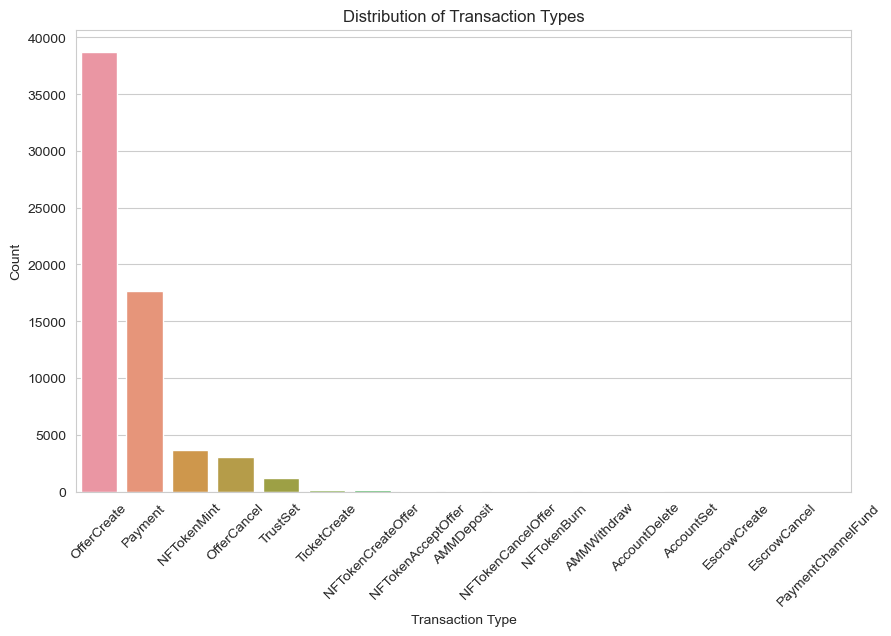

In [13]:
# Distribution of transaction types
transaction_counts = df['TransactionType'].value_counts()
print(transaction_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


##### Numerical Features

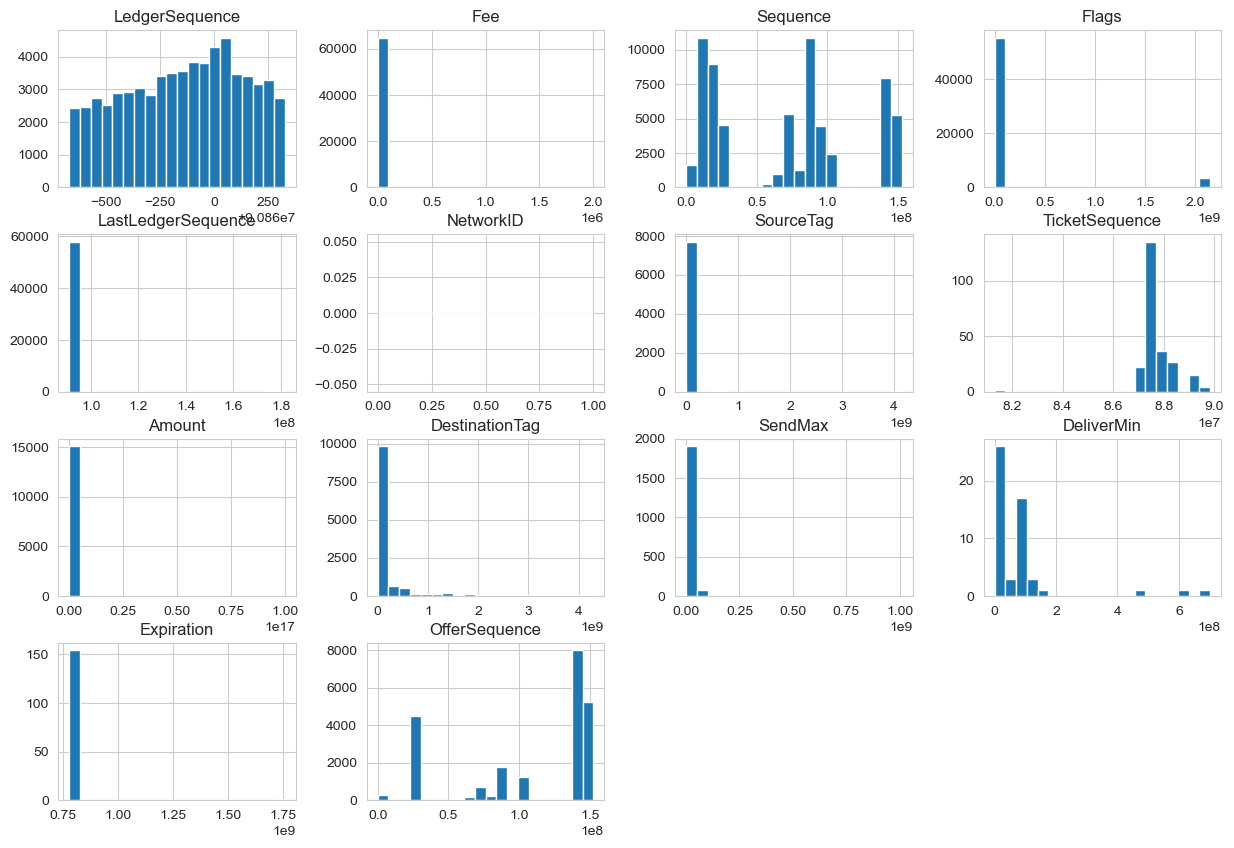

ValueError: num must be an integer with 1 <= num <= 6, not 7

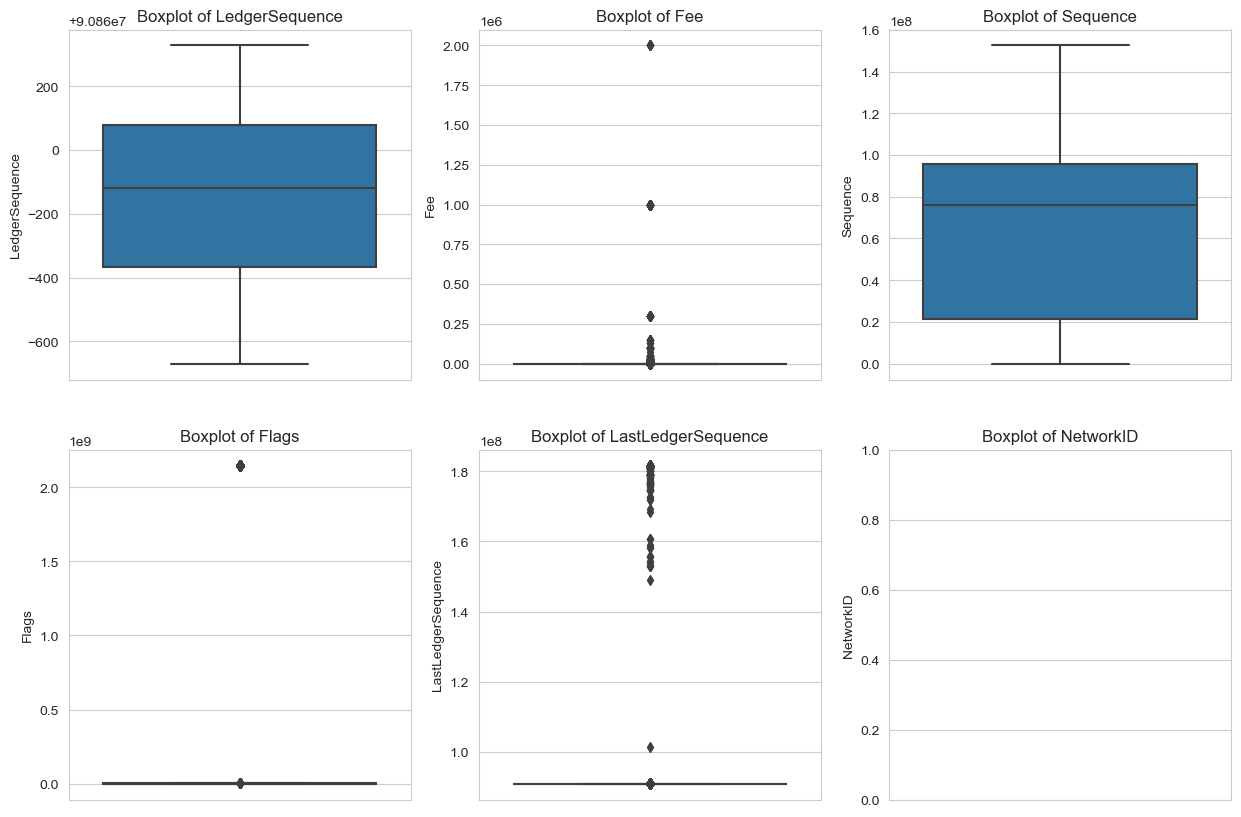

In [14]:
# Histograms for numerical columns
numerical_cols = [
    'LedgerSequence', 'Fee', 'Sequence', 'Flags', 'LastLedgerSequence',
    'NetworkID', 'SourceTag', 'TicketSequence', 'Amount', 'DestinationTag',
    'SendMax', 'DeliverMin', 'Expiration', 'OfferSequence', 
]

'''LimitAmount',
'QualityIn', 'QualityOut', 'OwnerCount', 'SetFlag', 'ClearFlag',
'TransferRate', 'RegularKey'''


df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


##### Time-Based Analysis


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df['CloseTime'] is already in datetime format
# Extract date and time features
df['CloseDate'] = df['CloseTime'].dt.date
df['CloseHour'] = df['CloseTime'].dt.hour

# Extract day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['CloseDayOfWeek'] = df['CloseTime'].dt.dayofweek

# Extract day of the month
df['CloseDayOfMonth'] = df['CloseTime'].dt.day

# Plot transactions over time
plt.figure(figsize=(12, 6))
df.groupby('CloseDate').size().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Transaction distribution by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='CloseHour', data=df)
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Transaction distribution by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='CloseDayOfWeek', data=df)
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Transaction distribution by day of the month
plt.figure(figsize=(12, 6))
sns.countplot(x='CloseDayOfMonth', data=df)
plt.title('Transactions by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.show()



In [15]:
# Plot Fee distribution by hour of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x='CloseHour', y='Fee', data=df)
plt.title('Transaction Fee Distribution by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Fee')
plt.show()

# Plot Fee distribution by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='CloseDayOfWeek', y='Fee', data=df)
plt.title('Transaction Fee Distribution by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Fee')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Plot Fee distribution by day of the month
plt.figure(figsize=(14, 6))
sns.boxplot(x='CloseDayOfMonth', y='Fee', data=df)
plt.title('Transaction Fee Distribution by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Fee')
plt.show()

ValueError: Could not interpret input 'CloseHour'

<Figure size 1200x600 with 0 Axes>

##### Correlation Analysis

/Users/leonardoheinemann/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


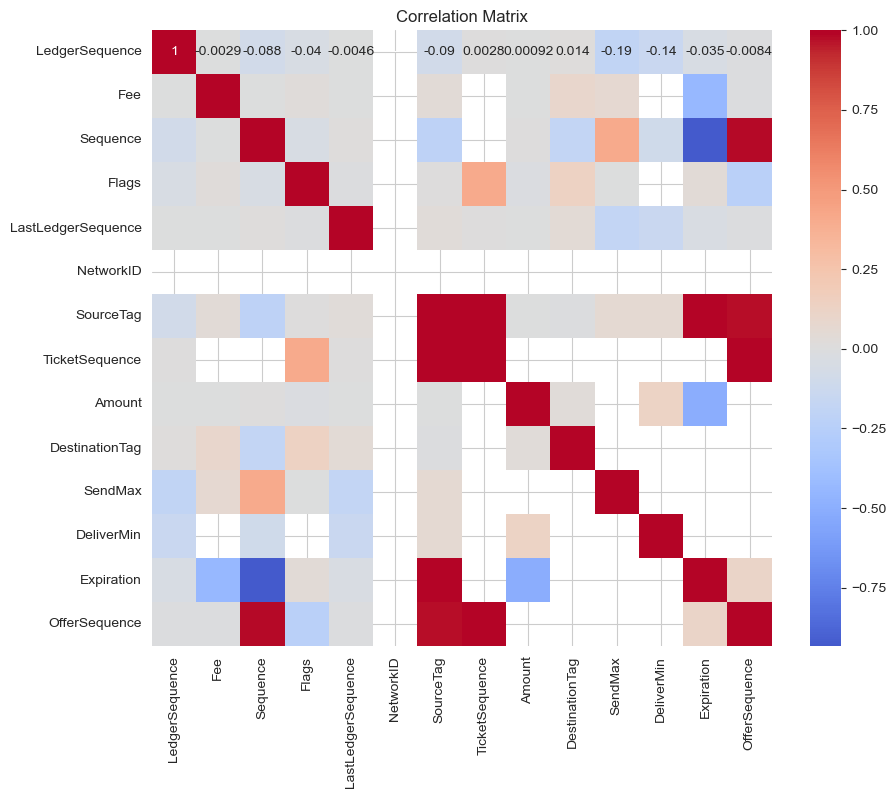

In [16]:
# Correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


#### Feature Engineering

##### Time Series Features

1. Transaction Frequency per Period

In [17]:
df['CloseTime'] = df['CloseTime'].dt.tz_localize(None)

df['DailyPeriod'] = df['CloseTime'].dt.to_period('D')
df['WeeklyPeriod'] = df['CloseTime'].dt.to_period('W')
df['MonthlyPeriod'] = df['CloseTime'].dt.to_period('M')

# Calculate frequencies per period
daily_freq_df = df.groupby('DailyPeriod').size().reset_index(name='DailyFrequency')
weekly_freq_df = df.groupby('WeeklyPeriod').size().reset_index(name='WeeklyFrequency')
monthly_freq_df = df.groupby('MonthlyPeriod').size().reset_index(name='MonthlyFrequency')

# Merge the frequencies back to the original dataframe
df = pd.merge(df, daily_freq_df, how='left', on='DailyPeriod')
df = pd.merge(df, weekly_freq_df, how='left', on='WeeklyPeriod')
df = pd.merge(df, monthly_freq_df, how='left', on='MonthlyPeriod')

# Drop the period columns as they are not needed anymore
df.drop(columns=['DailyPeriod', 'WeeklyPeriod', 'MonthlyPeriod'], inplace=True)

2. Fees over Time - MAYBE Rolling AVG better?????

In [18]:
# Drop timezone info from 'CloseTime'
df['CloseTime'] = df['CloseTime'].dt.tz_localize(None)

# Create period columns for daily, weekly, and monthly periods
df['DailyPeriod'] = df['CloseTime'].dt.to_period('D')
df['WeeklyPeriod'] = df['CloseTime'].dt.to_period('W')
df['MonthlyPeriod'] = df['CloseTime'].dt.to_period('M')

# Calculate the sum of 'Fee' per period
daily_fee_df = df.groupby('DailyPeriod')['Fee'].sum().reset_index(name='DailyFee')
weekly_fee_df = df.groupby('WeeklyPeriod')['Fee'].sum().reset_index(name='WeeklyFee')
monthly_fee_df = df.groupby('MonthlyPeriod')['Fee'].sum().reset_index(name='MonthlyFee')

# Merge the aggregated fees back to the original dataframe
df = pd.merge(df, daily_fee_df, how='left', on='DailyPeriod')
df = pd.merge(df, weekly_fee_df, how='left', on='WeeklyPeriod')
df = pd.merge(df, monthly_fee_df, how='left', on='MonthlyPeriod')

# Drop the period columns as they are not needed anymore
df.drop(columns=['DailyPeriod', 'WeeklyPeriod', 'MonthlyPeriod'], inplace=True)



In [19]:
df

,LedgerSequence,CloseTime,TransactionType,Account,Fee,Sequence,AccountTxnID,Flags,LastLedgerSequence,Memos,...,EmailHash,MessageKey,TransferRate,RegularKey,DailyFrequency,WeeklyFrequency,MonthlyFrequency,DailyFee,WeeklyFee,MonthlyFee
0,90860322,2024-09-19 17:42:50,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14486852,None,655360.0,90860323.0,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546
1,90860322,2024-09-19 17:42:50,Payment,rLR5BTsGcnMp5SwUzX1V9VCTbN1hayH61R,10,89794944,None,NaN,NaN,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546
2,90860322,2024-09-19 17:42:50,Payment,rapido5rxPmP4YkMZZEeXSHqWefxHEkqv6,10,21274300,None,131072.0,90860323.0,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546
3,90860322,2024-09-19 17:42:50,NFTokenAcceptOffer,r3qebgzfnj8odT4uLUk7CkikwnocE1HFgB,12,57714839,None,NaN,90860330.0,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546
4,90860322,2024-09-19 17:42:50,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14486860,None,655360.0,90860323.0,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64833,90859331,2024-09-19 16:39:01,OfferCreate,rogue5HnPRSszD9CWGSUz8UGHMVwSSKF6,10,14475379,None,655360.0,90859331.0,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546
64834,90859331,2024-09-19 16:39:01,Payment,rLVTL55bRs6NeyZeDN5NWoDQg9Tjk8GnZC,10,89795390,None,NaN,NaN,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546
64835,90859331,2024-09-19 16:39:01,OfferCreate,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,15,143764603,None,0.0,90859333.0,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546
64836,90859331,2024-09-19 16:39:01,Payment,rLu7e31Ff6uLk6p192NB4JfHx2onCZArzv,10,89726961,None,NaN,NaN,None,...,None,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546


3. Time Since Last Transaction

In [20]:
df = df.sort_values(by=['Account', 'CloseTime'])

# Calculate the time since the last transaction for each account
df['TimeSinceLastTxnInDays'] = df.groupby('Account')['CloseTime'].diff().dt.total_seconds() / (60 * 60 * 24)  # Convert to days

In [21]:
df

,LedgerSequence,CloseTime,TransactionType,Account,Fee,Sequence,AccountTxnID,Flags,LastLedgerSequence,Memos,...,MessageKey,TransferRate,RegularKey,DailyFrequency,WeeklyFrequency,MonthlyFrequency,DailyFee,WeeklyFee,MonthlyFee,TimeSinceLastTxnInDays
46342,90859675,2024-09-19 17:01:12,Payment,r1JebbLnbP3ot6Ng3vKj9BGyMWD4wJmGH,10,79913143,None,2.147484e+09,90859748.0,None,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,NaN
64197,90859340,2024-09-19 16:39:40,AMMDeposit,r2S9U7XqvGrrFGamRnTfVCoZeCq4TFZ3S,12,89678432,None,5.242880e+05,90859348.0,[{'Memo': {'MemoData': '5472616E73616374696F6E...,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,NaN
61512,90859399,2024-09-19 16:43:22,Payment,r2S9U7XqvGrrFGamRnTfVCoZeCq4TFZ3S,12,89678433,None,NaN,90859407.0,[{'Memo': {'MemoData': '436C61696D203330302024...,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,0.002569
64381,90859338,2024-09-19 16:39:30,OfferCreate,r2ZmzyuyDMF6PkywZ8BbMYYe7AvvVYZdA,221,74179142,None,0.000000e+00,90859344.0,None,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,NaN
63125,90859364,2024-09-19 16:41:10,OfferCreate,r2ZmzyuyDMF6PkywZ8BbMYYe7AvvVYZdA,221,74179143,None,0.000000e+00,90859370.0,None,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,0.001157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58856,90859450,2024-09-19 16:46:41,OfferCreate,rwswEwu47Ch5sgeqKs3PNB9kswsWQC8ndw,12,85094443,None,7.864320e+05,90859458.0,None,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,NaN
58543,90859454,2024-09-19 16:46:52,TrustSet,rwswEwu47Ch5sgeqKs3PNB9kswsWQC8ndw,12,85094444,None,2.228224e+06,90859462.0,None,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,0.000127
58398,90859459,2024-09-19 16:47:12,TrustSet,rwswEwu47Ch5sgeqKs3PNB9kswsWQC8ndw,12,85094445,None,1.310720e+05,90859467.0,None,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,0.000231
41712,90859750,2024-09-19 17:06:02,Payment,rwuWHdHA5uMuP4ZpvJt5yvHLpLvNiszgvq,500,90544515,None,0.000000e+00,181404263.0,None,...,None,NaN,NaN,64838,64838,64838,102177546,102177546,102177546,NaN


##### Account Specific Features

1. Account Activity Rate
    The average number of transactions per day/week/month for each account.


    Again: rolling AVG better?

In [22]:
# Calculate the daily, weekly, and monthly transaction count for each account
daily_txn_count = df.groupby(['Account', df['CloseTime'].dt.to_period('D')]).size().groupby('Account').mean()
weekly_txn_count = df.groupby(['Account', df['CloseTime'].dt.to_period('W')]).size().groupby('Account').mean()
monthly_txn_count = df.groupby(['Account', df['CloseTime'].dt.to_period('M')]).size().groupby('Account').mean()

# Merge these counts back into the main DataFrame
df = df.merge(daily_txn_count.rename('DailyActivityRate'), on='Account', how='left')
df = df.merge(weekly_txn_count.rename('WeeklyActivityRate'), on='Account', how='left')
df = df.merge(monthly_txn_count.rename('MonthlyActivityRate'), on='Account', how='left')


2. Unique Senders and Recipients for each Account

In [23]:
# Number of unique senders and recipients for each account
unique_senders = df.groupby('Account')['Destination'].nunique().reset_index(name='Unique_Senders')
unique_recipients = df.groupby('Account')['Destination'].nunique().reset_index(name='Unique_Recipients')

# Merge unique sender and recipient counts into the original DataFrame
df = df.merge(unique_senders, on='Account', how='left')
df = df.merge(unique_recipients, on='Account', how='left')


##### Fees

1. Fee / Amount Ratio

2. Cumulative Sum of Fees

In [24]:
# Calculate the Fee-to-Amount ratio
df['FeeToAmountRatio'] = df['Fee'] / df['Amount']

# Sort the DataFrame by Account and CloseTime
df = df.sort_values(by=['Account', 'CloseTime'])

# Calculate the cumulative sum of fees for each account
df['CumulativeFee'] = df.groupby('Account')['Fee'].cumsum()


In [25]:
df

,LedgerSequence,CloseTime,TransactionType,Account,Fee,Sequence,AccountTxnID,Flags,LastLedgerSequence,Memos,...,WeeklyFee,MonthlyFee,TimeSinceLastTxnInDays,DailyActivityRate,WeeklyActivityRate,MonthlyActivityRate,Unique_Senders,Unique_Recipients,FeeToAmountRatio,CumulativeFee
0,90859675,2024-09-19 17:01:12,Payment,r1JebbLnbP3ot6Ng3vKj9BGyMWD4wJmGH,10,79913143,None,2.147484e+09,90859748.0,None,...,102177546,102177546,NaN,1.0,1.0,1.0,1,1,2.372368e-07,10
1,90859340,2024-09-19 16:39:40,AMMDeposit,r2S9U7XqvGrrFGamRnTfVCoZeCq4TFZ3S,12,89678432,None,5.242880e+05,90859348.0,[{'Memo': {'MemoData': '5472616E73616374696F6E...,...,102177546,102177546,NaN,2.0,2.0,2.0,1,1,NaN,12
2,90859399,2024-09-19 16:43:22,Payment,r2S9U7XqvGrrFGamRnTfVCoZeCq4TFZ3S,12,89678433,None,NaN,90859407.0,[{'Memo': {'MemoData': '436C61696D203330302024...,...,102177546,102177546,0.002569,2.0,2.0,2.0,1,1,1.200000e+01,24
3,90859338,2024-09-19 16:39:30,OfferCreate,r2ZmzyuyDMF6PkywZ8BbMYYe7AvvVYZdA,221,74179142,None,0.000000e+00,90859344.0,None,...,102177546,102177546,NaN,63.0,63.0,63.0,0,0,NaN,221
4,90859364,2024-09-19 16:41:10,OfferCreate,r2ZmzyuyDMF6PkywZ8BbMYYe7AvvVYZdA,221,74179143,None,0.000000e+00,90859370.0,None,...,102177546,102177546,0.001157,63.0,63.0,63.0,0,0,NaN,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64833,90859450,2024-09-19 16:46:41,OfferCreate,rwswEwu47Ch5sgeqKs3PNB9kswsWQC8ndw,12,85094443,None,7.864320e+05,90859458.0,None,...,102177546,102177546,NaN,3.0,3.0,3.0,0,0,NaN,12
64834,90859454,2024-09-19 16:46:52,TrustSet,rwswEwu47Ch5sgeqKs3PNB9kswsWQC8ndw,12,85094444,None,2.228224e+06,90859462.0,None,...,102177546,102177546,0.000127,3.0,3.0,3.0,0,0,NaN,24
64835,90859459,2024-09-19 16:47:12,TrustSet,rwswEwu47Ch5sgeqKs3PNB9kswsWQC8ndw,12,85094445,None,1.310720e+05,90859467.0,None,...,102177546,102177546,0.000231,3.0,3.0,3.0,0,0,NaN,36
64836,90859750,2024-09-19 17:06:02,Payment,rwuWHdHA5uMuP4ZpvJt5yvHLpLvNiszgvq,500,90544515,None,0.000000e+00,181404263.0,None,...,102177546,102177546,NaN,1.0,1.0,1.0,1,1,2.000000e-06,500
